# Homework 4

In [ ]:
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.signal as sig
import statsmodels.api as sm

## Problem 1

Notes:
* anomalies (seasonal cycle removed)
* zonally averaged, SH, mid lat eddy activity


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Classes/OA/HW4/era_interim_SH_eke_300hPa.csv", header=None, names=['eke'])

In [ ]:
data

,eke
0,-16.5510
1,23.7330
2,35.4580
3,15.6640
4,5.9923
...,...
13144,9.1789
13145,-23.3070
13146,-37.6850
13147,-21.0100


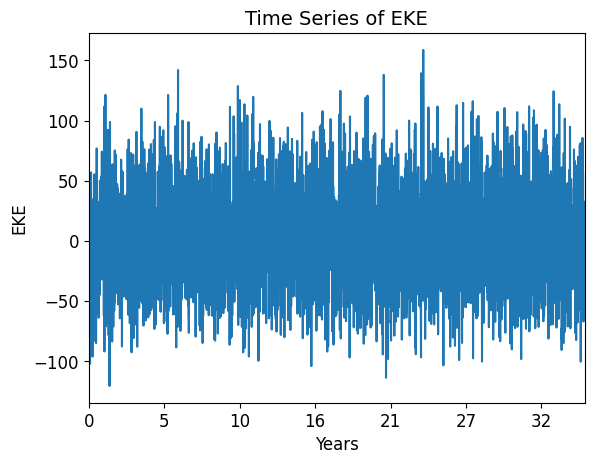

In [ ]:
# plot a time series of the data
fig, ax = plt.subplots(1, 1, dpi=100)
ax.plot(data)
ax.set_xticks(np.arange(0, len(data), 2000))
ax.set_xticklabels(np.arange(0, len(data), 2000)//365)
ax.set_xlabel("Years", fontsize=12)
ax.set_ylabel("EKE", fontsize=12)
ax.set_title("Time Series of EKE", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_xlim(0, len(data));
# fig.savefig('fig1.png')

In [ ]:
# calculate linear trend
reg = linear_model.LinearRegression()
reg.fit(np.arange(len(data)).reshape(-1, 1), data)
reg.coef_

array([[0.00028961]])

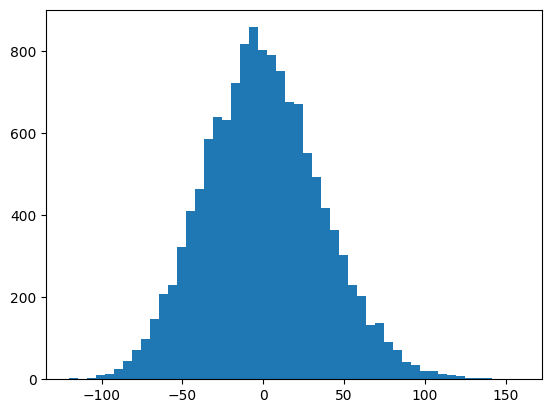

In [ ]:
# calculate distribution
fig, ax = plt.subplots(1, 1, dpi=100)
ax.hist(data, bins=50);

### (a)

In [ ]:
T = 256 # chunk size
N = len(data)//T # realizations
psum = 0

for n in np.arange(1, N+1):
  x = data[:n*T] # use T*n data
  p = sig.welch(np.ravel(x), window="hann", nperseg=T)
  psum += p[1]

# get normalized average of window
pave = psum / float(N)
pden = pave / np.sum(pave)

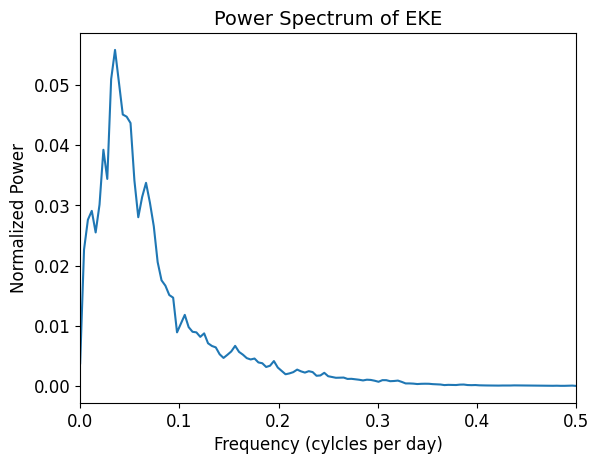

In [ ]:
fig, ax = plt.subplots(1, 1, dpi=100)
ax.plot(p[0], pden)
ax.set_title("Power Spectrum of EKE", fontsize=14)
ax.set_xlabel("Frequency (cylcles per day)", fontsize=12)
ax.set_ylabel("Normalized Power", fontsize=12)
ax.set_xlim(0.0, 0.5)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);
# fig.savefig('fig2.png')

In [ ]:
# get red noise null
r = sm.tsa.acf(data)[1]
Te = -1/np.log(r)
cphi = ((2*Te)/(1+(Te**2)*((2*np.pi*p[0])**2)))/np.sum((2*Te)/(1+(Te**2)*((2*np.pi*p[0])**2)))
inside = (T*2*np.pi*p[0])/N
dphi = ((1-r**2)/(1-2*r*np.cos((inside*np.pi)/(N/2))+r**2))/np.sum((1-r**2)/(1-2*r*np.cos((inside*np.pi)/(N/2))+r**2))

# get 99 percent lines
dof_eke = len(data)/(256/2)
dof = 1000
f = stats.f.ppf(0.9999, dof_eke, dof)

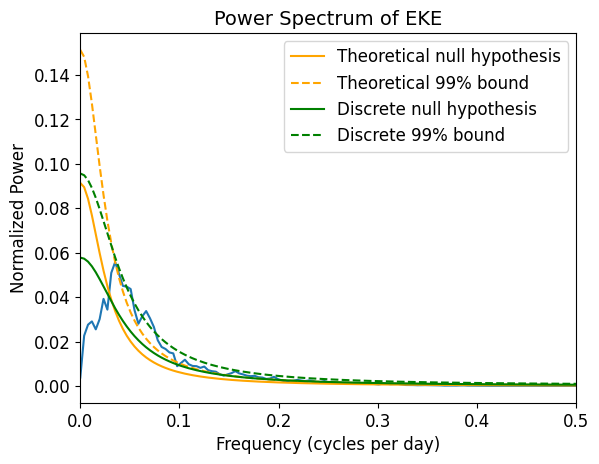

In [ ]:
# add red noise null to plot
fig, ax = plt.subplots(1, 1, dpi=100)
ax.plot(p[0], pden)
ax.plot(p[0], cphi, c='orange', label='Theoretical null hypothesis')
ax.plot(p[0], f*cphi, c='orange', linestyle='--', label='Theoretical 99% bound')
ax.plot(p[0], dphi, c='green', label='Discrete null hypothesis')
ax.plot(p[0], f*dphi, c='green', linestyle='--', label='Discrete 99% bound')
ax.set_title("Power Spectrum of EKE", fontsize=14)
ax.set_xlabel("Frequency (cycles per day)", fontsize=12)
ax.set_ylabel("Normalized Power", fontsize=12)
ax.set_xlim(0.0, 0.5)
ax.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);
# fig.savefig('fig3.png')

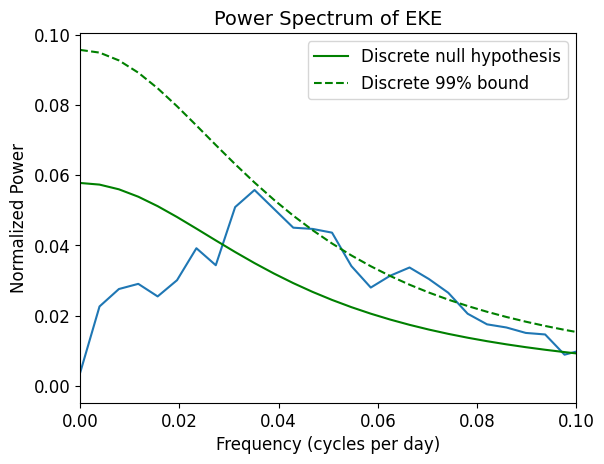

In [ ]:
# add red noise null to plot
fig, ax = plt.subplots(1, 1, dpi=100)
ax.plot(p[0], pden)
# ax.plot(p[0], cphi, c='orange', label='Theoretical null hypothesis')
# ax.plot(p[0], fc*cphi, c='orange', linestyle='--', label='Theoretical 99% bound')
ax.plot(p[0], dphi, c='green', label='Discrete null hypothesis')
ax.plot(p[0], f*dphi, c='green', linestyle='--', label='Discrete 99% bound')
ax.set_title("Power Spectrum of EKE", fontsize=14)
ax.set_xlabel("Frequency (cycles per day)", fontsize=12)
ax.set_ylabel("Normalized Power", fontsize=12)
ax.set_xlim(0.0, 0.1)
ax.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);
# fig.savefig('fig4.png')